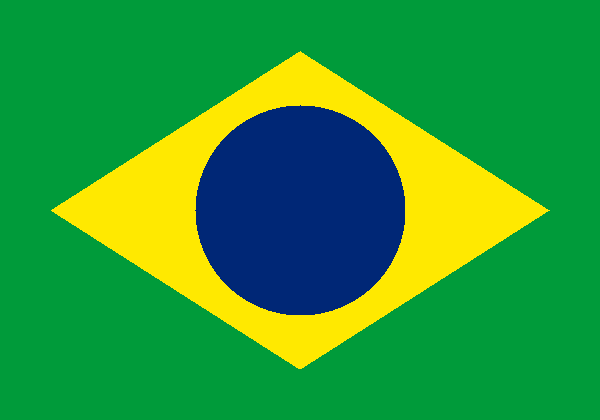

In [31]:
from PIL import Image
def create_brazilian_flag(widht):

    green = (0, 155, 58)
    yellow = (255, 233, 0)
    blue = (0, 39, 118)

    #Proporções da bandeira
    height = int ((14/20) * widht)
    unit = int(widht/20)
    polygon_spacing = int(unit * 1.7)
    radius = int(unit * 3.5)
    center = (widht//2, height//2)

    #Definindo os pontos do pilogono
    top_x, top_y = center [0], polygon_spacing
    right_x, right_y = (widht - polygon_spacing), center[1]
    bottom_x, bottom_y = center[0], (height - polygon_spacing)
    left_x, left_y = polygon_spacing, center[1]

    def interpolate_x(y, start_point, final_point):
        if start_point [1] == final_point[1]:
            return start_point[0]
        
        x = int (start_point[0] + ((y - start_point[1]) * (final_point[0] - start_point[0])) / (final_point[1] - start_point[1]))
        return x
    
    brazilian_flag = Image.new('RGB', (widht, height), green)

    for y in range (top_y, bottom_y):
        if y < center[1]:
            x_min = interpolate_x(y, (top_x, top_y), (left_x, left_y))
            x_max = interpolate_x(y, (top_x, top_y), (right_x, right_y))

        else:
            x_min = interpolate_x(y, (left_x, left_y), (bottom_x, bottom_y))
            x_max = interpolate_x(y, (right_x, right_y), (bottom_x, bottom_y))



        for x in range(x_min, x_max + 1):
            brazilian_flag.putpixel((x, y), yellow)

    for x in range(center[0]-radius, center[0]+radius):
        for y in range(center[1]-radius, center[1]+radius):
            if ((x-center[0])**2 + (y-center[1])**2) <= radius**2:
                brazilian_flag.putpixel((x, y), blue)
    return brazilian_flag

create_brazilian_flag(600)
